Calcular el polinomio caracteristico, los autovalores y autvectores propios de la siguiente matrices, comprobar con la solucion analitica:

a)

\begin{equation}
\begin{bmatrix}
1 & -1 & 4\\
3 & 2 & -1\\
2 & 1 & -1
\end{bmatrix}
\end{equation}

b)

\begin{bmatrix}
3 & -5 \\
1 & -1
\end{bmatrix}

In [46]:
#Librería
import numpy as np
import sympy as sy
import matplotlib.pylab as plt

In [47]:
#Calculo de determinantes
def det2x2(B1):
    fil,col=np.shape(B1)
    if fil==2 and col==2:
        a=B1[0, 0]
        b=B1[0, 1]
        c=B1[1, 0]
        d=B1[1, 1]
        determinante=(a*d)-(b*c)
        return determinante
    else:
        print("La matriz no es 2x2")

def det3x3(B1):
    fil,col=np.shape(B1)
    if fil==3 and col==3 :
        a=B1[0, 0]
        b=B1[0, 1]
        c=B1[0, 2]
        d=B1[1, 0]
        e=B1[1, 1]
        f=B1[1, 2]
        g=B1[2, 0]
        h=B1[2, 1]
        i=B1[2, 2]
        determinante=a*(e*i-f*h)-b*(d*i-f*g)+c*(d*h-e*g)
        return determinante
    else:
        print("la matriz no es 3x3")


In [48]:
#Halle el polinomio característico de las matrices dependiendo de su dimensión
def polinomio_carac(B1):
    dim=sy.shape(B1)
    lamb=sy.Symbol("\lambda")

    if dim==(2,2):
        I=sy.eye(2)
        B_p= (B1-lamb*I)
        pol_carac=sy.poly(det2x2(B_p))
        return pol_carac


    if dim==(3,3):
        I=sy.eye(3)
        B_p= (B1-lamb*I)
        pol_carac=sy.poly(det3x3(B_p))
        return pol_carac


In [49]:
#Valores propios son los que se derivan del polinomio característico
def valores_propios(B1):
    lamb=sy.Symbol("\lambda")
    v_sol= sy.solve(polinomio_carac(B1),lamb)
    return sy.Matrix(v_sol)

In [50]:
#Operaciones elementales y reducción de matriz
def reduccion(b2):
    f,c=b2.shape
    b2_reducida=np.copy(b2).astype("float64")

    for i in range(f):
        if b2_reducida[i,i]==0:
            for k in range(i+1,f):
                if b2_reducida[k,i]!=0:
                    b2_reducida[[i,k],:]=b2_reducida[[k,i],:]
                    break
            else:
                for j in range(i+1,f):
                    if b2_reducida[j,i]!=0:
                        factor=b2_reducida[j,i]/b2_reducida[i,i]
                        b2_reducida[j,i:]-=factor*b2_reducida[i,i:]
    return sy.Matrix(b2_reducida)

In [51]:
#Calculo de vectores propios
def vectores_propios(B_1):
    x=sy.Symbol("x")
    y=sy.Symbol("y")
    z=sy.Symbol("z")
    dim=sy.shape(B_1)
    M=sy.Matrix()
    vp=valores_propios(B_1)

    if dim==(2,2):
        for i in range(0,len(vp)):
            Mredv_p=B_1-vp[i]*sy.eye(2)
            componente_vector_propio=-1*Mredv_p[0,0]/Mredv_p[0,1]
            vector_propio_componentes=sy.Matrix([1,componente_vector_propio])
            M=M.row_join(vector_propio_componentes)
        return M

    elif dim==(3,3):
        for i in range(0,len(vp)):
            Mr=B_1-vp[i]*sy.eye(3)
            Ms=reduccion(Mr)
            sis_ampliado=sy.Matrix([[Ms[0,1],Ms[0,2]],
                                    [Ms[1,1],Ms[1,2]]])
            b=sy.Matrix([-x*Ms[0,0],-x*Ms[1,0]])
            sv=sy.Matrix([y,z])
            solucion_sis=sy.solve(sis_ampliado*sv-b,[y,z])
            vector_propio=sy.Matrix([1,solucion_sis[y]/x,solucion_sis[z]/x])
            M=M.row_join(vector_propio)
        return M

# Realizando comparación con la librería de numpy

In [52]:
#Matriz3x3
A=np.matrix([[1,-1,4],
             [3,2,-1],
             [2,1,-1]])
A_s=sy.Matrix(A)

#Matriz2x2
B=np.matrix([[3,-5],
             [1,-1]])
B_s=sy.Matrix(B)

# Polinomio Característico

In [53]:
#Matriz2x2
polinomio2x2=polinomio_carac(B_s)
print(f"Polinomio característico a través del código elaborado:{polinomio2x2}")

Polinomio característico a través del código elaborado:Poly(\lambda**2 - 2*\lambda + 2, \lambda, domain='ZZ')


In [54]:
polinomionp2=np.poly(B)
print(f"Polinomio característico(numpy):{polinomionp2}")

Polinomio característico(numpy):[ 1. -2.  2.]


In [55]:
#matriz3x3
polinomio3x3=polinomio_carac(A_s)
print(f"Polinomio característico a través del código elaborado:{polinomio3x3}")

Polinomio característico a través del código elaborado:Poly(-\lambda**3 + 2*\lambda**2 + 5*\lambda - 6, \lambda, domain='ZZ')


In [56]:
polinomionp3=np.poly(A)
print(f"Polinomio característico(numpy):{polinomionp3}")

Polinomio característico(numpy):[ 1. -2. -5.  6.]


# Valores propios

In [57]:
#Matriz2x2
valor_propio=valores_propios(B_s)
print(f"valores propios (numpy):{valor_propio}")

valores propios (numpy):Matrix([[1 - I], [1 + I]])


In [58]:
valores,vectores=np.linalg.eig(B)
print(f"valores propios (numpy):{valores}")

valores propios (numpy):[1.+1.j 1.-1.j]


In [59]:
#matriz3x3
valor_propio3=valores_propios(A_s)
print(f"valores propios (numpy):{valor_propio3}")

valores propios (numpy):Matrix([[-2], [1], [3]])


In [60]:
valores,vectores=np.linalg.eig(A)
print(f"Valores propios(numpy):{valores}")

Valores propios(numpy):[ 3. -2.  1.]


# Vectores propios

In [61]:
#Matriz2x2
vector_propio=vectores_propios(B_s)
print(f"Vectores propios a través del código creado:{vector_propio}")

valores,vectores=np.linalg.eig(B)
print(f"Vectores propios(numpy):{vectores}")

Vectores propios a través del código creado:Matrix([[1, 1], [2/5 + I/5, 2/5 - I/5]])
Vectores propios(numpy):[[0.91287093+0.j         0.91287093-0.j        ]
 [0.36514837-0.18257419j 0.36514837+0.18257419j]]


In [62]:
#matriz3x3
vector_propio=vectores_propios(A_s)
print(f"Vectores propios a través del código creado:{vector_propio}")

Vectores propios a través del código creado:Matrix([[1, 1, 1], [-1, -4.00000000000000, 2.00000000000000], [-1, -1, 1]])


In [63]:
valores,vectores=np.linalg.eig(A)
print(f"Vectores propios(numpy):{vectores}")

Vectores propios(numpy):[[ 0.40824829  0.57735027  0.23570226]
 [ 0.81649658 -0.57735027 -0.94280904]
 [ 0.40824829 -0.57735027 -0.23570226]]


# **Actividad 2**

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:
$A\vec{v}\cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica.

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}
  
1. Realice un grafico que represente la hyperbola.

- Diagonalice A, para ello construya la matrix Q de autovectores ortoganale, tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.
- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base.
\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}

\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}

\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}

Sea $u=Q^T\vec{v}$

Luego :
\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola

In [64]:
A2=np.matrix([[1,-2],
             [-2,3]])

In [65]:
#Autovalores y autovectores de A
valores,vectores=np.linalg.eig(A2)

In [66]:
print(f"los valores propios de A2 son:{valores}")

los valores propios de A2 son:[-0.23606798  4.23606798]


In [67]:
print(f"los vectores propios de A2 son:{vectores}")

los vectores propios de A2 son:[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [68]:
#Diagonal de la matriz A2
Matriz_Diagonal=np.matrix([[valores[0],0],
                           [0,valores[1]]])

In [69]:
#Matriz ortogonal
Matrizv=vectores
Matriz_ortogonal=np.transpose(Matrizv)

In [70]:
#Matriz de Rotación
def matriz_de_rotacion(M):
    #Garantizar que es cuadrada
    if not M.shape[0]==M.shape[1]:
        return False

    #Verificar determinante
    det=np.linalg.det(M)
    print(det)
    if not np.isclose(det,1.0):
        return False
    return True

matriz_de_rotacion(Matriz_ortogonal)

0.9999999999999998


True

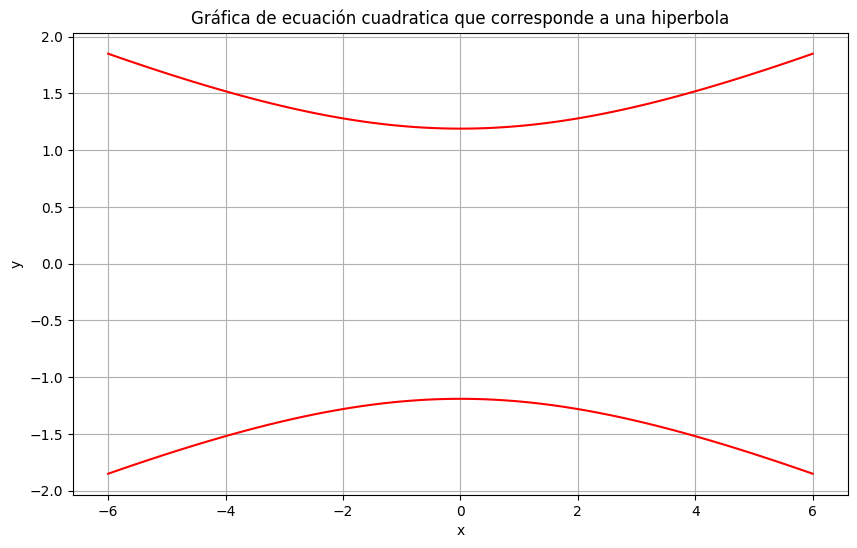

In [71]:
def grafico(x):
    funcion=np.sqrt((6-valores[0]*(x**2))/valores[1])
    return funcion

intervalo_x=np.linspace(-6,6,100)

y_positiva=grafico(intervalo_x)
y_negativa=(-1)*grafico(intervalo_x)

plt.figure(figsize=(10,6))
plt.plot(intervalo_x,y_positiva,"r")
plt.plot(intervalo_x,y_negativa,"r")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfica de ecuación cuadratica que corresponde a una hiperbola")
plt.grid(True)
plt.show()

In [72]:
A2=np.array([[1,-2],
             [-2,3]])
valores,vectores=np.linalg.eig(A2)

In [73]:
#Verificar que es diagonalizable ortogonalemente
if not np.allclose(vectores@vectores.T,np.eye(len(A2))):
    print("La matriz no es diagonalizable ortogonalmente")
    exit()

#Matriz de Q de autovectores ortogonales
Q=vectores
D=np.diag(valores)

#Verificar que A=QDQ.T
if not np.allclose(A2,Q @ D @ Q.T):
    print("Error en la diagonalización ortogonal")
    exit()

In [74]:

#Generar puntos en la nueva base
x_=np.linspace(-10,10,400)
y_=np.linspace(-10,10,400)
x2,y2=np.meshgrid(x_,y_)
v=np.vstack((x2.ravel(),y2.ravel())) #https://notebook.community/relopezbriega/mi-python-blog/content/notebooks/pyOptimization, https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

#Aplicar la transformación a la nueva base
u=Q.T @ v

#Calcular la nueva hiperbola en la nueva base
d=1
hiperbola = (u[0]**2 / d**2) - (u[1]**2 / d**2)

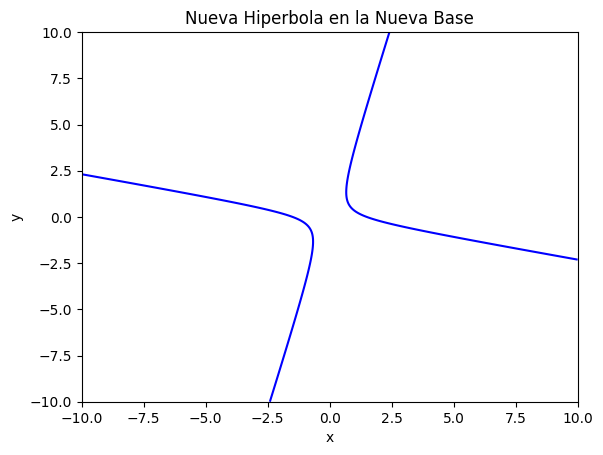

In [75]:
plt.contour(x2,y2,hiperbola.reshape(x2.shape),levels=[1],colors="blue") # hiperbola.reshape(x.shape) sugerido por chat gpt, porque sin eso no tiene la disposicion espacial que los puntos en la malla bidimensional
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nueva Hiperbola en la Nueva Base")
plt.show()